# *The* simplest neural network

In [44]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go

In [46]:
def animate_px(df, xlim, ylim, width = 700, height = 700, epoch_range = [0, 10]):

    # plot the prediction
    fig = px.line(
                 df[(df.epoch>=epoch_range[0]) & (df.epoch<epoch_range[1])], 
                 x="x", 
                 y="y_pred", animation_frame="epoch"
                )
            
    # plot the actual (unknown) function
    fig.add_trace(
            px.line(
        df[(df.epoch>=epoch_range[0]) & (df.epoch<epoch_range[1])], 
                x="x", y="y_act", animation_frame="epoch", 
                color_discrete_sequence=["#264653"]).data[0]
    )
        
    # plot the input / training data
    fig.add_trace(
        px.scatter(
                   df[(df.epoch>=epoch_range[0]) & (df.epoch<epoch_range[1])], 
                   x="x", y="y_noisy", opacity = 0.5, animation_frame="epoch", 
                   color_discrete_sequence=["#f72585"]).data[0]
                )               


    # Set the x and y limits
    fig.update_xaxes(range=[xlim[0], xlim[1]])
    fig.update_yaxes(range=[ylim[0], ylim[1]])
    
    # Set the aspect ratio
    fig.update_layout(width=width, 
                      height=height, 
                      autosize=False, 
                      margin=dict(l=50, r=50, b=100, t=100, pad=4), 
                      xaxis=dict(scaleanchor="y", scaleratio=1), 
                      yaxis=dict(scaleanchor="x", scaleratio=1))


    # Show the animation
    fig.show()
    

In [47]:
'''
This is possibly the simplest code for a neural network. It only uses numpy libraries and transparent matrix operations
generated with the help of chat-GPT (through several iterative rounds of queries)

Not that this code does not have any additional bells and whistles such as regularization. This is only meant for demo purposes 
and not for real-world applications. 
'''

def get_df_pred_epoch(df, N_HL=3, learn_rate = 0.0001, max_epoch = 5000):
    
    x = np.array(df['x'].values)
    y = np.array(df['y_noisy'].values)
    
    y = y.reshape(-1, 1)
    
    # Define the network architecture
    input_size  = 1
    hidden_size = N_HL
    output_size = 1

    # Initialize the weights and biases
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.random.randn(hidden_size)

    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.random.randn(output_size)

    # Define the activation function (ReLU)
    def relu(x):
        return np.maximum(x, 0)

    # Define the derivative of the activation function (ReLU)
    def relu_derivative(x):
        return np.where(x <= 0, 0, 1)

    # Define the learning rate
    learning_rate = learn_rate

    df_pred_epoch = pd.DataFrame(columns = ['x', 'y_pred', 'epoch'])

    # Train the network
    for epoch in range(max_epoch):

        # Forward pass
        hidden_layer = relu(np.dot(x.reshape(-1, 1), W1) + b1)
        y_pred       = np.dot(hidden_layer, W2) + b2

        # Calculate the loss (MSE)
        loss   = np.mean((y_pred - y) ** 2)

        # Backward pass
        delta2 = y_pred - y
        dW2    = np.dot(hidden_layer.T, delta2)
        db2    = np.sum(delta2, axis=0)
        delta1 = np.dot(delta2, W2.T) * relu_derivative(hidden_layer)
        dW1    = np.dot(x, delta1)
        db1    = np.sum(delta1, axis=0)

        # Update the weights and biases
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        
        # Print the loss every 100 epochs
        if ((epoch % 20 == 0) & (epoch > 0)):
            # print(f"Epoch {epoch}, loss = {loss}")
            dfx = pd.DataFrame(np.array([x, y_pred.reshape(1, -1)[0], np.full_like(x, epoch)]).T, columns = ['x', 'y_pred', 'epoch'])
            df_pred_epoch = pd.concat([df_pred_epoch, dfx], axis = 0)


        if epoch < 10:
            if epoch % 1 == 0:
                
                ## plotting the basis functions at the beginning of forward pass
                # y0_arr = []
                # for i in range(0, b1.shape[0]):
                #     y_basis = relu(W1[0][i]*x + b1[i])
                #     y0_arr.append(y_basis)
                # y0_arr = np.array(y0_arr)
                # data_xy_basis = {'x': x}
                # for i in range(y0_arr.shape[0]):
                #     data_xy_basis[f'y0_{i}'] = y0_arr[i, :]
                # df_xy_basis = pd.DataFrame(data_xy_basis)
                
                dfx = pd.DataFrame(np.array([x, y_pred.reshape(1, -1)[0], np.full_like(x, epoch)]).T, columns = ['x', 'y_pred', 'epoch'])
                
                # dfx = dfx.merge(df_xy_basis, on = 'x', how = 'outer')
                # show_plot_intermed(dfx, epoch) 
                
                df_pred_epoch = pd.concat([df_pred_epoch, dfx], axis = 0)
                
    df_pred_epoch = df.merge(df_pred_epoch,   on='x',   how = 'outer')

    print ('done')
    
    return df_pred_epoch

In [42]:

def get_df_pred_epoch(df, N_HL=3, learn_rate=0.0001, max_epoch=5000):
    
    x = np.array(df['x'].values)
    y = np.array(df['y_noisy'].values)
    y = y.reshape(-1, 1)
    
    # Initialize the weights and biases
    input_size = 1
    hidden_size = N_HL
    output_size = 1

    np.random.seed(0)
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.random.randn(hidden_size)

    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.random.randn(output_size)

    # Define the activation function (ReLU)
    def relu(x):
        return np.maximum(x, 0)

    # Define the derivative of the activation function (ReLU)
    def relu_derivative(x):
        return np.where(x <= 0, 0, 1)

    # Define the learning rate
    learning_rate = learn_rate

    df_pred_epoch = pd.DataFrame(columns=['x', 'y_pred', 'epoch', 'N_HL'])

    # Train the network
    for epoch in range(max_epoch):

        # Forward pass
        hidden_layer = relu(np.dot(x.reshape(-1, 1), W1) + b1)
        y_pred = np.dot(hidden_layer, W2) + b2

        # Calculate the loss (MSE)
        loss = np.mean((y_pred - y) ** 2)

        # Backward pass
        delta2 = y_pred - y
        dW2 = np.dot(hidden_layer.T, delta2)
        db2 = np.sum(delta2, axis=0)
        delta1 = np.dot(delta2, W2.T) * relu_derivative(hidden_layer)
        dW1 = np.dot(x.reshape(-1, 1), delta1)
        db1 = np.sum(delta1, axis=0)

        # Update the weights and biases
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        
        # Append data to df_pred_epoch every 100 epochs
        if (epoch % 100 == 0):
            df_epoch = pd.DataFrame({'x': x, 'y_pred': y_pred.flatten(), 'epoch': epoch, 'N_HL': N_HL})
            df_pred_epoch = pd.concat([df_pred_epoch, df_epoch], ignore_index=True)

    # Merge predicted values with original DataFrame
    df_pred_epoch = df.merge(df_pred_epoch, on='x', how='outer')

    return df_pred_epoch

In [5]:
def f_act(x):
    
    # # parabola
    # a = 0.2
    # b = -0.5
    # c = 3
    # x0 = 0
    # return a*(x-x0)**2 + c
    
    # # # cubic
    # a = -2
    # b = 0.2
    # c = 0
    
    # # return a*(x) + b*x**3 + c*x**3
    # return np.sin(x)*a + np.cos(x*b) + c**2

    #A = 1
    #k = 0.51
    #ω = 2
    #φ = 0

    A = 1.0   # Amplitude
    ω = 2.0   # Angular frequency
    φ = 0.0
    
    return A * np.exp(-k * x) * np.sin(ω * x + φ)
    
#     log function
    # return 

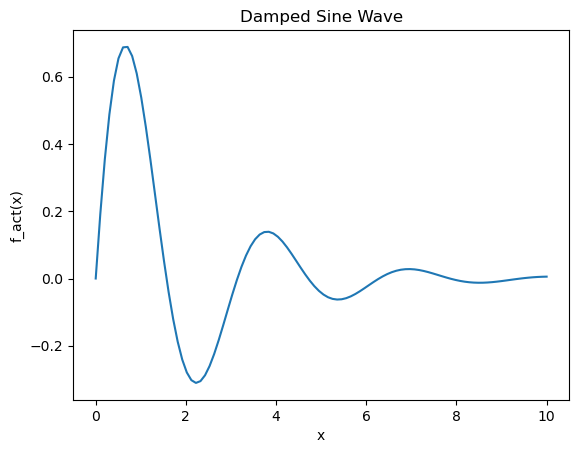

In [6]:
def f_act(x):
    # Sine function parameters
    A = 1.0   # Amplitude
    k = 0.51  # Damping factor
    ω = 2.0   # Angular frequency
    φ = 0.0   # Phase shift
    
    # Sine function with exponential decay
    return A * np.exp(-k * x) * np.sin(ω * x + φ)

# Example usage:
x_values = np.linspace(0, 10, 100)
y_values = f_act(x_values)

import matplotlib.pyplot as plt

plt.plot(x_values, y_values)
plt.title("Damped Sine Wave")
plt.xlabel("x")
plt.ylabel("f_act(x)")
plt.show()

In [7]:
def f_noisy(x):
    noise = 0.55
    
    return f_act(x) + random.uniform(-noise, noise)

In [48]:
# Define different numbers of hidden layers to test
hidden_layers_list = [1, 3, 5, 10]

# Generate predictions and collect data for each number of hidden layers
df_pred_all = pd.DataFrame()
for N_HL in hidden_layers_list:
    df_pred_epoch = get_df_pred_epoch(df, N_HL=N_HL)
    df_pred_all = pd.concat([df_pred_all, df_pred_epoch], ignore_index=True)

# Plot the results
fig = go.Figure()

for N_HL in hidden_layers_list:
    df_N_HL = df_pred_all[df_pred_all['N_HL'] == N_HL]
    fig.add_trace(go.Scatter(x=df_N_HL['x'], y=df_N_HL['y_pred'], mode='lines', name=f'N_HL={N_HL}'))

fig.add_trace(go.Scatter(x=df['x'], y=df['y_noisy'], mode='markers', name='Noisy Sine Wave'))
fig.update_layout(title='Effect of Number of Hidden Layers (N_HL) on Predicted Sine Wave',
                  xaxis_title='x',
                  yaxis_title='y_pred')

fig.show()

NameError: name 'df' is not defined

Epoch 100/2000, Loss: 0.0433
Epoch 200/2000, Loss: 0.0429
Epoch 300/2000, Loss: 0.0423
Epoch 400/2000, Loss: 0.0414
Epoch 500/2000, Loss: 0.0403
Epoch 600/2000, Loss: 0.0393
Epoch 700/2000, Loss: 0.0385
Epoch 800/2000, Loss: 0.0378
Epoch 900/2000, Loss: 0.0373
Epoch 1000/2000, Loss: 0.0370
Epoch 1100/2000, Loss: 0.0366
Epoch 1200/2000, Loss: 0.0364
Epoch 1300/2000, Loss: 0.0361
Epoch 1400/2000, Loss: 0.0358
Epoch 1500/2000, Loss: 0.0356
Epoch 1600/2000, Loss: 0.0353
Epoch 1700/2000, Loss: 0.0349
Epoch 1800/2000, Loss: 0.0346
Epoch 1900/2000, Loss: 0.0343
Epoch 2000/2000, Loss: 0.0339
Epoch 100/2000, Loss: 0.0435
Epoch 200/2000, Loss: 0.0434
Epoch 300/2000, Loss: 0.0434
Epoch 400/2000, Loss: 0.0434
Epoch 500/2000, Loss: 0.0434
Epoch 600/2000, Loss: 0.0434
Epoch 700/2000, Loss: 0.0434
Epoch 800/2000, Loss: 0.0434
Epoch 900/2000, Loss: 0.0434
Epoch 1000/2000, Loss: 0.0434
Epoch 1100/2000, Loss: 0.0434
Epoch 1200/2000, Loss: 0.0434
Epoch 1300/2000, Loss: 0.0434
Epoch 1400/2000, Loss: 0.043

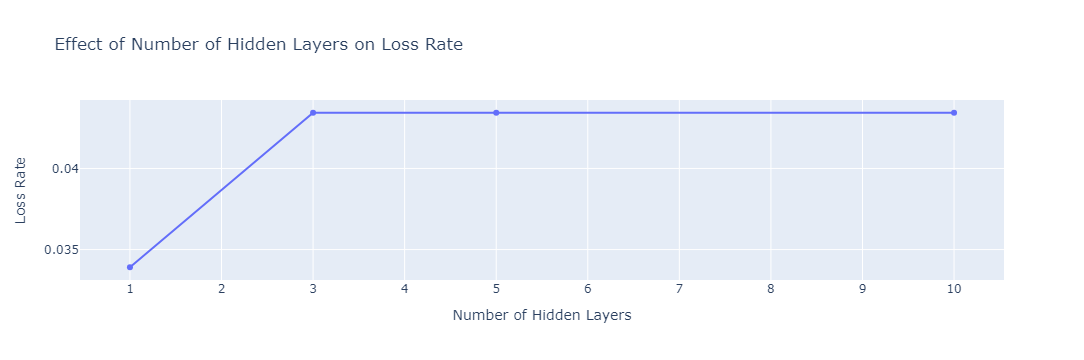

In [40]:
def train_nn(X, y, hidden_layers, epochs=1000, lr=0.01):
    layer_sizes = [1] + hidden_layers + [1]
    nn = SimpleNN(layer_sizes)
    loss_history = []
    
    for epoch in range(epochs):
        output = nn.forward(X)
        loss = mean_squared_error(y, output)
        loss_history.append(loss)
        nn.backward(X, y, output, lr)
        
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")
    
    return nn, loss_history

# Prepare the data
X = x_values.reshape(-1, 1)
y = y_values.reshape(-1, 1)

# Define the different numbers of hidden layers
hidden_layers_list = [
    [5],        # 1 hidden layer with 5 neurons
    [5, 5, 5],  # 3 hidden layers with 5 neurons each
    [10, 10, 10, 10, 10],  # 5 hidden layers with 10 neurons each
    [20, 20, 20, 20, 20, 20, 20, 20, 20, 20]  # 10 hidden layers with 20 neurons each
]
epochs = 2000
lr = 0.01
loss_rates = []

for hidden_layers in hidden_layers_list:
    nn, loss_history = train_nn(X, y, hidden_layers, epochs, lr)
    final_loss = loss_history[-1]
    loss_rates.append(final_loss)

# Plot the results
hidden_layer_counts = [len(layers) for layers in hidden_layers_list]
fig = go.Figure()
fig.add_trace(go.Scatter(x=hidden_layer_counts, y=loss_rates, mode='lines+markers', name='Loss Rate'))

fig.update_layout(title='Effect of Number of Hidden Layers on Loss Rate',
                  xaxis_title='Number of Hidden Layers',
                  yaxis_title='Loss Rate',
                  xaxis=dict(tickmode='linear'))

fig.show()


## make input/training data

In [8]:
xmin = -5
xmax = 5
dx = 0.1

x_arr = np.arange(xmin, xmax, dx)

xy_arr = []

for xi in x_arr:
    xy_arr.append([xi, f_act(xi), f_noisy(xi)])


In [9]:
df_xy = pd.DataFrame(xy_arr, columns = ['x', 'y_act', 'y_noisy'])


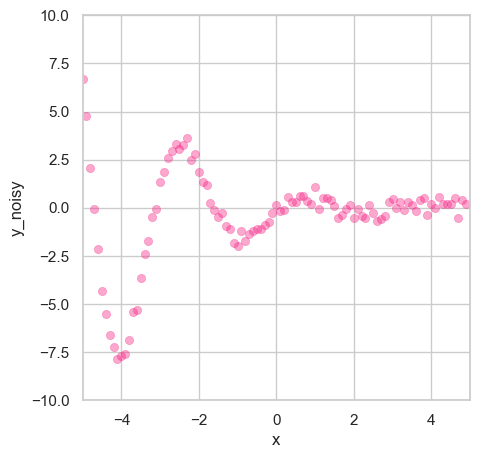

In [10]:
sns.set(rc={'figure.figsize':(5, 5)}, font_scale = 1)
sns.set_style("whitegrid")

sns.scatterplot(data = df_xy,
                x = 'x', y = 'y_noisy',
                edgecolor = None, alpha = 0.4, s = 35, color = '#f72585'
               )

# sns.lineplot(data = df_xy,
#                 x = 'x', y = 'y_act',
#                 alpha = 1, color = 'black', lw = 0.8
#                )

plt.xlim(xmin, xmax)
plt.ylim(-10, 10)
plt.show()

In [11]:
df_xy_par = df_xy 

In [12]:
df_xy_cub = df_xy 

## generate predictions (fits) with DNN

In [17]:
df_pred_epoch = get_df_pred_epoch(df_xy_par, N_HL = 10, learn_rate = 0.0001, max_epoch = 10000)

C:\Users\rajuv\AppData\Local\Temp\ipykernel_19476\2135570138.py:91: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



done


In [18]:
df_pred_epoch

x     y_act   y_noisy    y_pred   epoch
0     -5.0  6.967335  6.680022 -3.926373     0.0
1     -5.0  6.967335  6.680022 -3.983510     1.0
2     -5.0  6.967335  6.680022 -3.558745     2.0
3     -5.0  6.967335  6.680022 -3.205434     3.0
4     -5.0  6.967335  6.680022 -2.921987     4.0
...    ...       ...       ...       ...     ...
50895  4.9 -0.030113  0.171105  0.014707  9900.0
50896  4.9 -0.030113  0.171105  0.014752  9920.0
50897  4.9 -0.030113  0.171105  0.014797  9940.0
50898  4.9 -0.030113  0.171105  0.014841  9960.0
50899  4.9 -0.030113  0.171105  0.014885  9980.0

[50900 rows x 5 columns]

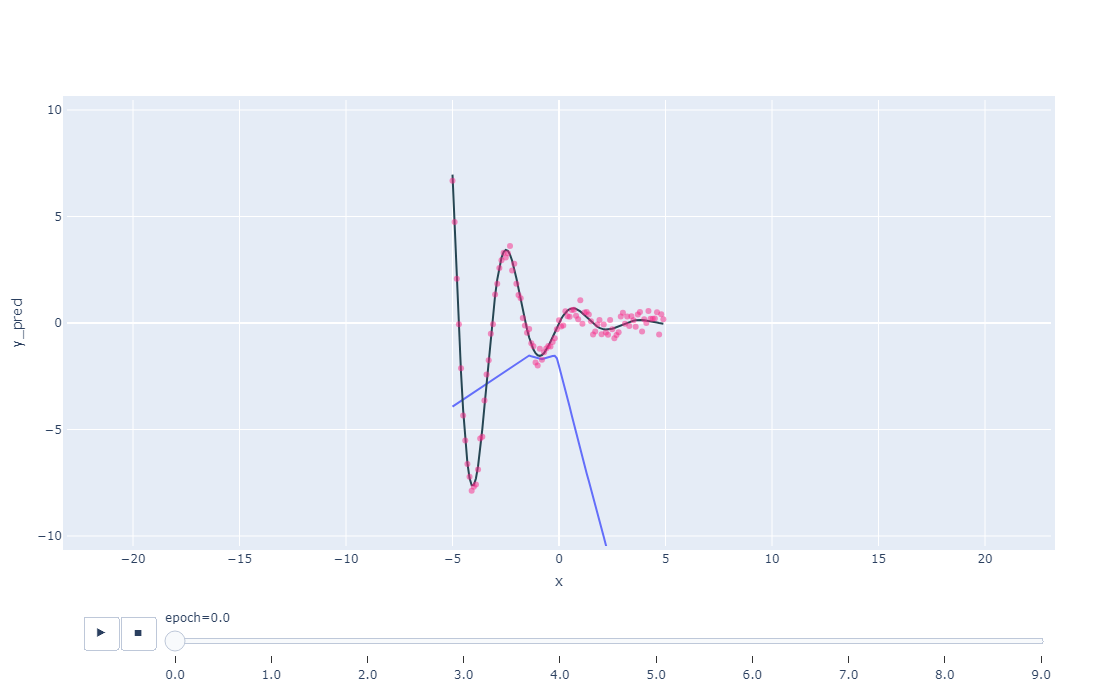

In [19]:
animate_px(df_pred_epoch, [-5, 5], [-10, 10], epoch_range = [0, 10])

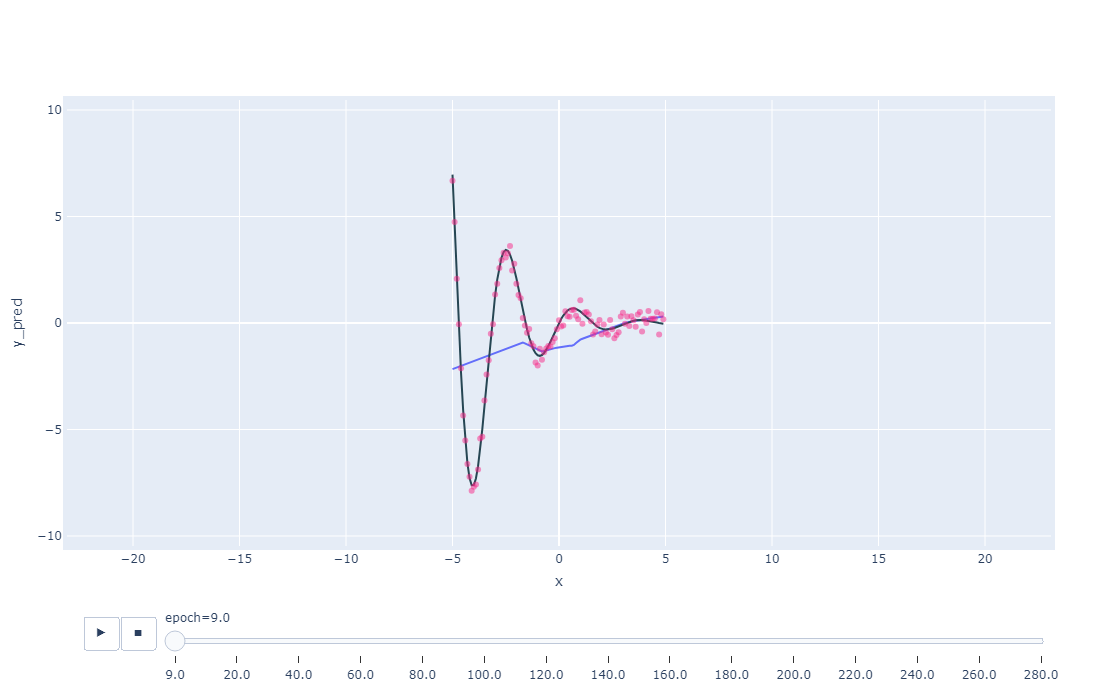

In [20]:
animate_px(df_pred_epoch, [-5, 5], [-10, 10], epoch_range = [9, 300])

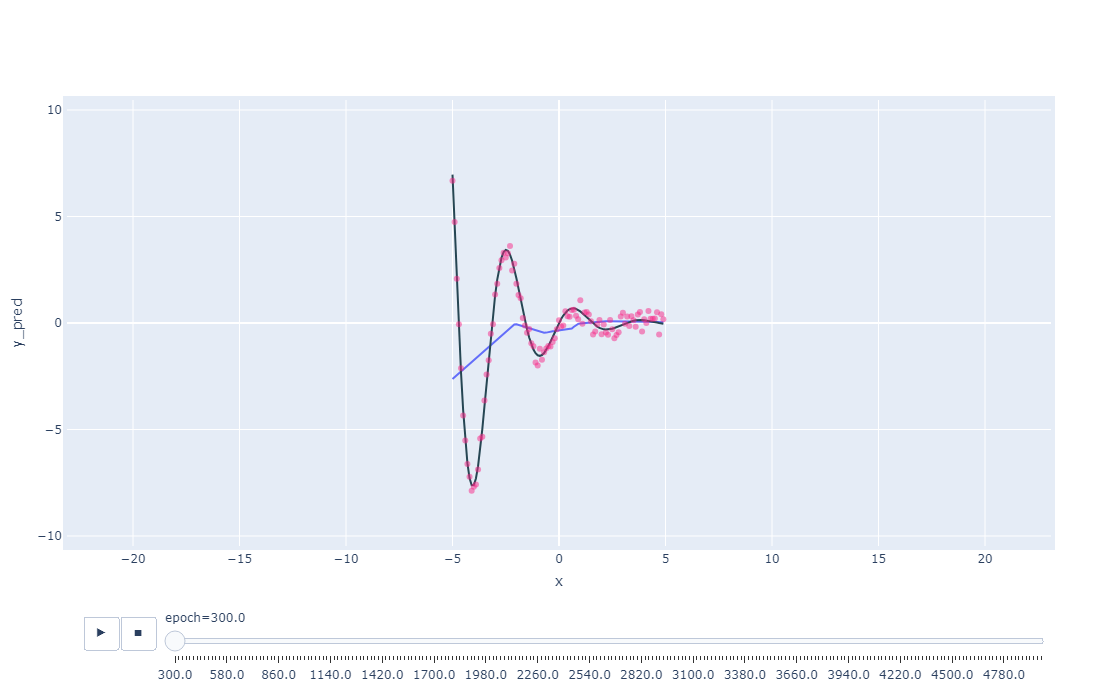

In [21]:
animate_px(df_pred_epoch, [-5, 5], [-10, 10], epoch_range = [300, 4999])

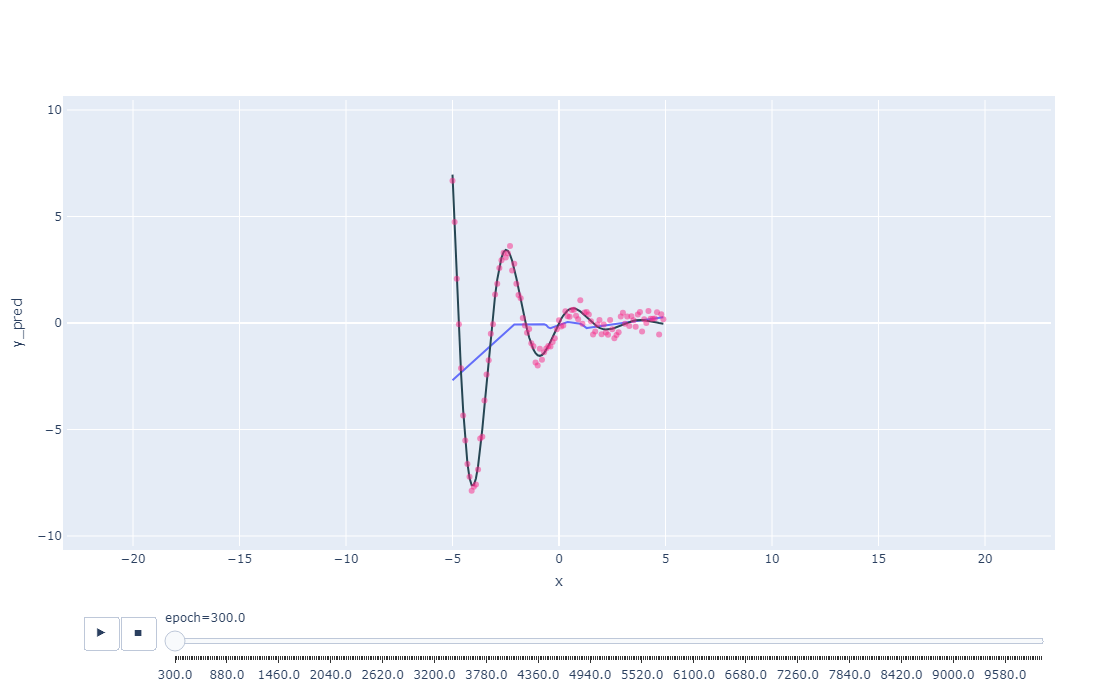

In [16]:
animate_px(df_pred_epoch, [-5, 5], [-10, 10], epoch_range = [300, 9999])

In [22]:
df_pred_epoch

x     y_act   y_noisy    y_pred   epoch
0     -5.0  6.967335  6.680022 -3.926373     0.0
1     -5.0  6.967335  6.680022 -3.983510     1.0
2     -5.0  6.967335  6.680022 -3.558745     2.0
3     -5.0  6.967335  6.680022 -3.205434     3.0
4     -5.0  6.967335  6.680022 -2.921987     4.0
...    ...       ...       ...       ...     ...
50895  4.9 -0.030113  0.171105  0.014707  9900.0
50896  4.9 -0.030113  0.171105  0.014752  9920.0
50897  4.9 -0.030113  0.171105  0.014797  9940.0
50898  4.9 -0.030113  0.171105  0.014841  9960.0
50899  4.9 -0.030113  0.171105  0.014885  9980.0

[50900 rows x 5 columns]